In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [23]:
f = open("genome.fna", "r")
sequence = ""
for line in f:
    if not line.startswith(">"):
        sequence += line.strip()
        

In [24]:
len(sequence)

3625508

In [44]:
cut_sites = ["AAGCTT", "CATATG", "GGATCC", "GATATC"]
enzymes = ["HindIII", "NdeI", "BamHI", "EcoRV"]
indexes = {cut_site: [] for cut_site in cut_sites}

In [26]:
for i in range(len(sequence)):
    if sequence[i:i+6] in cut_sites:
        indexes[sequence[i:i+6]].append(i)

Text(0, 0.5, 'Number of HindIII cut sites')

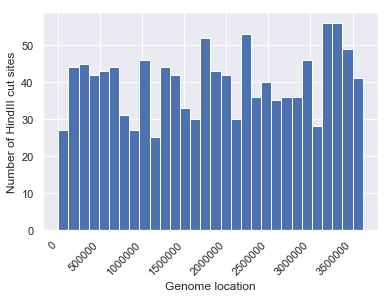

In [8]:
plt.hist(indexes, bins=30)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genome location")
plt.ylabel("Number of HindIII cut sites")

In [28]:
lengths = {cut_site: [] for cut_site in cut_sites}

In [30]:
for cut_site in indexes.keys():
    for i in range(len(indexes[cut_site])-1):
        lengths[cut_site].append(indexes[cut_site][i+1] - indexes[cut_site][i])

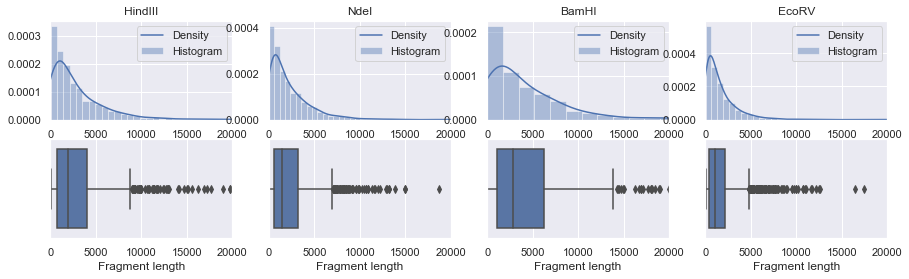

In [68]:
fig, ax =plt.subplots(2,len(cut_sites), figsize=(15,4))

for i in range(len(cut_sites)):
    sns.distplot(lengths[cut_sites[i]], ax=ax[0, i], rug=False, kde_kws={"gridsize": 500, "label": "Density"}, hist_kws={"label": "Histogram"}, norm_hist=False)
    ax[0,i].set_xlim(0,20000)
    ax[0,i].set_title(enzymes[i])
    sns.boxplot(lengths[cut_sites[i]], ax=ax[1, i])
    ax[1,i].set_xlim(0,20000)
    ax[1,i].set_xlabel("Fragment length")
    fig.show()

In [61]:
pd.Series(lengths[cut_sites[0]]).describe()

count     1201.000000
mean      3012.140716
std       3686.806875
min          7.000000
25%        768.000000
50%       1914.000000
75%       4016.000000
max      35072.000000
dtype: float64

In [62]:
pd.Series(lengths[cut_sites[1]]).describe()

count     1577.000000
mean      2297.746988
std       2652.708819
min          6.000000
25%        615.000000
50%       1454.000000
75%       3189.000000
max      29606.000000
dtype: float64

In [63]:
pd.Series(lengths[cut_sites[2]]).describe()

count      765.000000
mean      4727.742484
std       6362.078404
min          6.000000
25%       1031.000000
50%       2893.000000
75%       6227.000000
max      86447.000000
dtype: float64

In [64]:
pd.Series(lengths[cut_sites[3]]).describe()

count     2158.000000
mean      1679.117238
std       2215.382762
min          6.000000
25%        410.250000
50%       1037.000000
75%       2156.000000
max      32672.000000
dtype: float64